In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
data = pd.read_csv('data/GPD by Country.csv')

In [266]:
data.head()

,Country Name,Year,GDP,GDP per Capita
0,United States,2021,2.299610e+13,69288
1,Luxembourg,2021,8.671080e+10,135683
2,United States,2020,2.089370e+13,63028
3,Luxembourg,2020,7.335313e+10,116356
4,United States,2019,2.137260e+13,65095


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'GDP per Capita'}>, <Axes: >]],
      dtype=object)

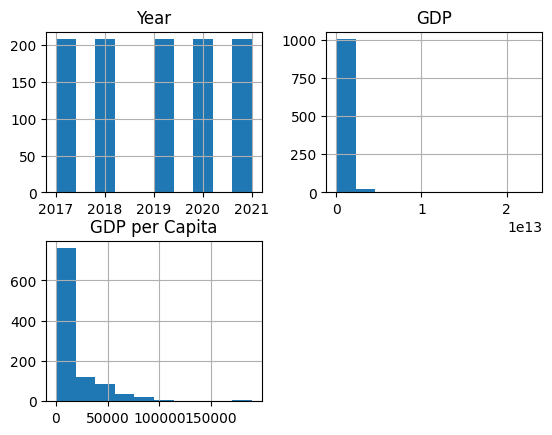

In [267]:
data.hist()

In [268]:
data.shape

(1040, 4)

In [269]:
data.describe()

,Year,GDP,GDP per Capita
count,1040.000000,1.040000e+03,1040.000000
mean,2019.000000,4.133068e+11,17035.365385
std,1.414894,1.860078e+12,25488.462634
min,2017.000000,0.000000e+00,0.000000
25%,2018.000000,5.504274e+09,1990.250000
50%,2019.000000,2.471019e+10,6258.000000
75%,2020.000000,1.835938e+11,20695.500000
max,2021.000000,2.299610e+13,189487.000000


In [270]:
data.dtypes

Country Name       object
Year                int64
GDP               float64
GDP per Capita      int64
dtype: object

In [271]:
set(data['Year'])

{2017, 2018, 2019, 2020, 2021}

In [272]:
set(data['Country Name'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic Of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guam',
 

In [273]:
'Oman' in set(data['Country Name'])

True

In [274]:
oman_data = data[data['Country Name'] == 'Oman']

In [275]:
oman_data.head()

,Country Name,Year,GDP,GDP per Capita
366,Oman,2021,8.586863e+10,16439
368,Oman,2020,7.397139e+10,14485
370,Oman,2019,8.806086e+10,17701
372,Oman,2018,9.150585e+10,18947
374,Oman,2017,8.085670e+10,17329


In [276]:
oman_data = oman_data.sort_values(by='Year')

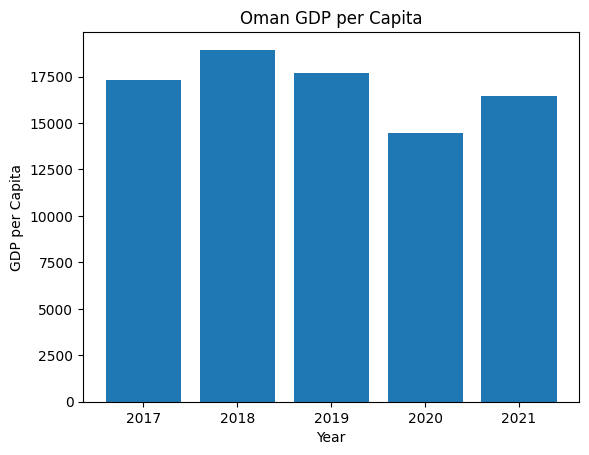

In [277]:
plt.figure()
plt.bar([str(year) for year in oman_data['Year']], oman_data['GDP per Capita'])
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('Oman GDP per Capita')
plt.show()

In [278]:
def world_average_measurmnts(data):
    years = list(set(data['Year']))
    average_gpd = []
    average_gpd_per_capita = []
    for year in years:
        filtered_data = data[data['Year'] == year]
        average_gpd.append(np.mean(filtered_data['GDP']))
        average_gpd_per_capita.append(np.mean(filtered_data['GDP per Capita']))
    df = {
        'Year' : years,
        'Worldwide GDP' : average_gpd,
        'Worldwide GDP per Capita' : average_gpd_per_capita
    }
    return pd.DataFrame(df)


In [279]:
average_data = world_average_measurmnts(data)

In [280]:
average_data.head()

,Year,Worldwide GDP,Worldwide GDP per Capita
0,2017,3.867431e+11,17838.701923
1,2018,4.106147e+11,18895.846154
2,2019,4.164164e+11,18589.932692
3,2020,4.026959e+11,15900.932692
4,2021,4.500639e+11,13951.413462


In [ ]:
plt.scatter(x = data['Year'])

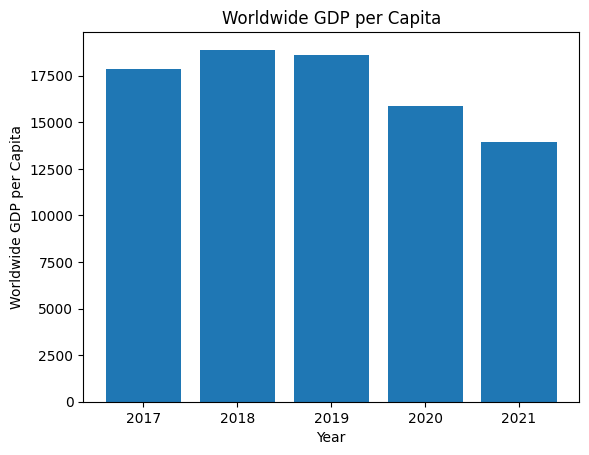

In [281]:
plt.figure()
plt.bar([str(year) for year in average_data['Year']], average_data['Worldwide GDP per Capita'])
plt.xlabel('Year')
plt.ylabel('Worldwide GDP per Capita')
plt.title('Worldwide GDP per Capita')
plt.show()

In [282]:
data.isnull().values.sum()

0

In [283]:
data.shape

(1040, 4)

In [284]:
data = data[data['GDP per Capita'] != 0]


In [285]:
data.shape

(1004, 4)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'GDP'}>],
       [<Axes: title={'center': 'GDP per Capita'}>, <Axes: >]],
      dtype=object)

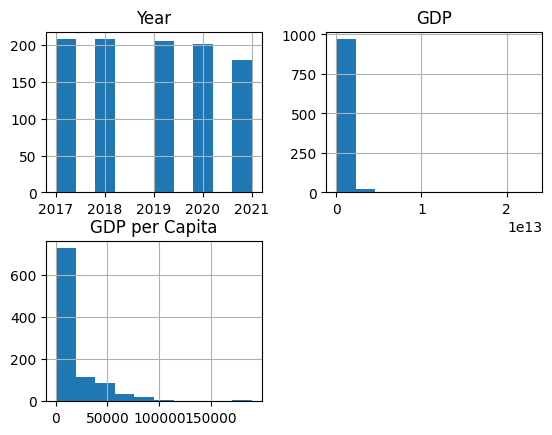

In [286]:
data.hist()


There is no enough data but Continuing this Projects will be a proof of concept.

### The targeted model:
    
        -Input the Country
        -Input a future Year
        -Output the predicted GDP Per Capita
    


Feature Engineering

In [287]:
#Label Encoder
"""def year_encoding(data):
    years = data['Year']
    enc = [i+1 for i in range(len(years))]
    encoded_years = {
        'Year' : list(set(years)),
        'Encoded Year' : list(set(enc))
    }
    data['Encoded Year'] = enc
    return data,encoded_years"""

"def year_encoding(data):\n    years = data['Year']\n    enc = [i+1 for i in range(len(years))]\n    encoded_years = {\n        'Year' : list(set(years)),\n        'Encoded Year' : list(set(enc))\n    }\n    data['Encoded Year'] = enc\n    return data,encoded_years"

In [288]:
"""def year_decoding(input):
    encoded_years = year_encoding(data)[1]
    year_dict = dict(zip(encoded_years['Encoded Year'], encoded_years['Year']))
    return year_dict[input]"""


"def year_decoding(input):\n    encoded_years = year_encoding(data)[1]\n    year_dict = dict(zip(encoded_years['Encoded Year'], encoded_years['Year']))\n    return year_dict[input]"

In [289]:
"data = year_encoding(data)[0]"

'data = year_encoding(data)[0]'

In [290]:
data.head()

,Country Name,Year,GDP,GDP per Capita
0,United States,2021,2.299610e+13,69288
1,Luxembourg,2021,8.671080e+10,135683
2,United States,2020,2.089370e+13,63028
3,Luxembourg,2020,7.335313e+10,116356
4,United States,2019,2.137260e+13,65095


In [291]:
from sklearn.preprocessing import LabelEncoder

In [292]:
YearEncoder = LabelEncoder()

In [293]:
YearEncoder.fit(data['Year'])
data['Encoded Year'] = YearEncoder.transform(data['Year'])

In [294]:
CountryNameEncoder = LabelEncoder()

In [295]:
CountryNameEncoder.fit(data['Country Name'])

LabelEncoder()

In [296]:
data['Encoded Country Name'] = CountryNameEncoder.transform(data['Country Name'])

In [297]:
data.head()

,Country Name,Year,GDP,GDP per Capita,Encoded Year,Encoded Country Name
0,United States,2021,2.299610e+13,69288,4,198
1,Luxembourg,2021,8.671080e+10,135683,4,108
2,United States,2020,2.089370e+13,63028,3,198
3,Luxembourg,2020,7.335313e+10,116356,3,108
4,United States,2019,2.137260e+13,65095,2,198


In [300]:
model_input = data[['Encoded Year','Encoded Country Name', 'GDP', 'GDP per Capita']]

<Axes: >

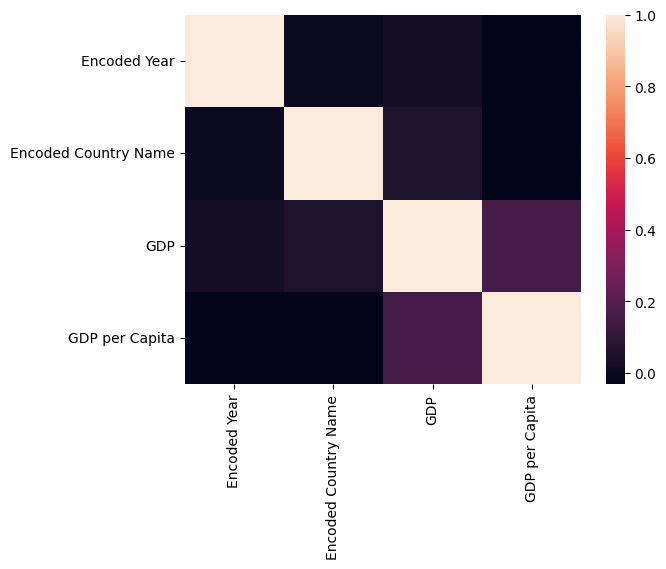

In [302]:
sns.heatmap(model_input.corr())

Text(0.5, 0, 'GPD per Capita')

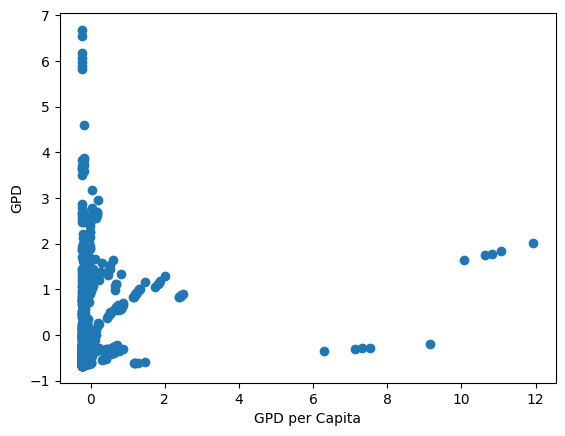

In [313]:
plt.scatter(x = model_input['GDP'], y = model_input['GDP per Capita'])
plt.ylabel('GPD')
plt.xlabel('GPD per Capita')

it has a potentioal to be f(x) = |x^3|

In [304]:
from sklearn.preprocessing import StandardScaler

In [306]:
gpd_per_capita_scaler = StandardScaler()
gpd_scaler = StandardScaler()

In [308]:
model_input['GDP per Capita'] = gpd_per_capita_scaler.fit_transform(model_input['GDP per Capita'].values.reshape(-1,1))
model_input['GDP'] = gpd_per_capita_scaler.fit_transform(model_input['GDP'].values.reshape(-1,1))

/tmp/ipykernel_16083/3727404779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input['GDP per Capita'] = gpd_per_capita_scaler.fit_transform(model_input['GDP per Capita'].values.reshape(-1,1))
/tmp/ipykernel_16083/3727404779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input['GDP'] = gpd_per_capita_scaler.fit_transform(model_input['GDP'].values.reshape(-1,1))


In [309]:
model_input.head()

,Encoded Year,Encoded Country Name,GDP,GDP per Capita
0,4,198,11.937288,2.007828
1,4,108,-0.180591,4.589258
2,3,198,10.825227,1.764440
3,3,108,-0.187657,3.837827
4,2,198,11.078541,1.844804


In [324]:
X = model_input.drop('GDP per Capita', axis='columns')
y = model_input

In [314]:
from sklearn.linear_model import LinearRegression

In [316]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [315]:
linear_model = LinearRegression()